# <center> Predicting Type of Fruits by K-Nearest Neighbor Classifier <center>

# 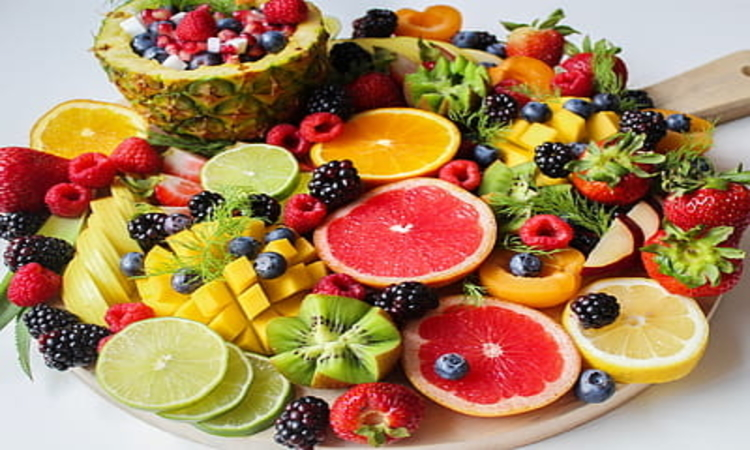

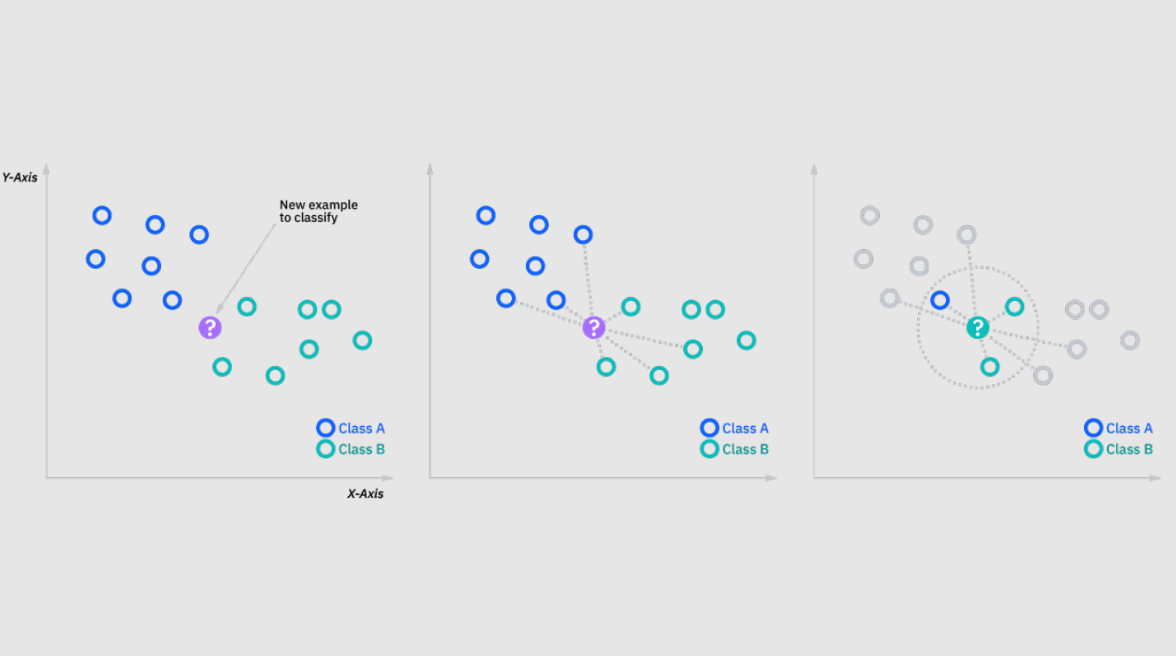

## Introduction

In this notebook, we will use Fruits with Colors Dataset and implement Key-Nearest Neighbours algorithm to make a model which predicts name of fruits based on thier physical characteristics such as mass, width and height.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import plotly.io as pio
pio.renderers.default='notebook'

## Loading Dataset

In [2]:
df=pd.read_table('fruit_data_with_colors.txt')

In [4]:
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [5]:
df

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [6]:
df.shape

(59, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


The data is clean and we do not perform Data Cleaning.

## Exploratory Data Analysis

In [9]:
# Check different fruits in this dataset
df['fruit_name'].unique()

array(['apple', 'mandarin', 'orange', 'lemon'], dtype=object)

In [38]:
fig=px.scatter_3d(df,x='width',y='height',z='color_score',color='fruit_name',color_continuous_scale='teal')
fig.update_layout(
    title={
        'text': 'Width vs. Height vs. Mass for Different Type of Fruits',
        'y':0.92,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

## Prediction of Fruits types by KNN

### Standardizing the Data

In [39]:
ss=StandardScaler()

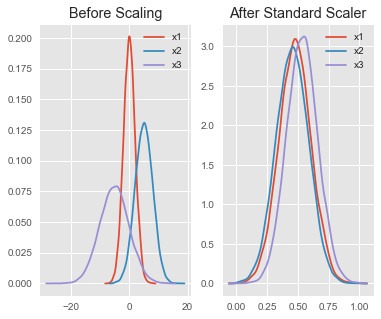

Some more references: https://thecleverprogrammer.com/2020/09/22/standardscaler-in-machine-learning/

In [40]:
ss.fit(df[['color_score', 'width', 'height']])

StandardScaler()

In [42]:
scaled=ss.transform(df[['color_score', 'width', 'height']])

In [43]:
scaled_df=pd.DataFrame(data=scaled, columns=df.columns[3:6])

In [44]:
scaled_df.head()

,mass,width,height
0,-2.793595,1.598690,-0.291397
1,-2.268684,1.104854,-0.661922
2,-2.137456,0.364100,-0.365502
3,0.487100,-1.117409,-2.218131
4,0.355872,-1.364327,-2.292236


In [45]:
scaled_df.shape

(59, 3)

### Splitting the Data

In [46]:
X=scaled_df
y=df['fruit_name']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Finding the Optimal number of Neighbors (K) with Elbow Method
https://medium.com/@moussadoumbia_90919/elbow-method-in-supervised-learning-optimal-k-value-99d425f229e7

In [48]:
error_rate=[]
for n in range(1,40):
    knc=KNeighborsClassifier(n_neighbors=n)
    knc.fit(X_train,y_train)
    prediction=knc.predict(X_test)
    error_rate.append(np.mean(prediction!=y_test))
print(error_rate)

[0.1111111111111111, 0.16666666666666666, 0.05555555555555555, 0.1111111111111111, 0.1111111111111111, 0.16666666666666666, 0.1111111111111111, 0.16666666666666666, 0.16666666666666666, 0.2777777777777778, 0.2777777777777778, 0.2777777777777778, 0.2222222222222222, 0.3333333333333333, 0.3333333333333333, 0.3888888888888889, 0.5, 0.5555555555555556, 0.5555555555555556, 0.6111111111111112, 0.6111111111111112, 0.6111111111111112, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.7222222222222222, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.8333333333333334, 0.8333333333333334, 0.7777777777777778, 0.7777777777777778]


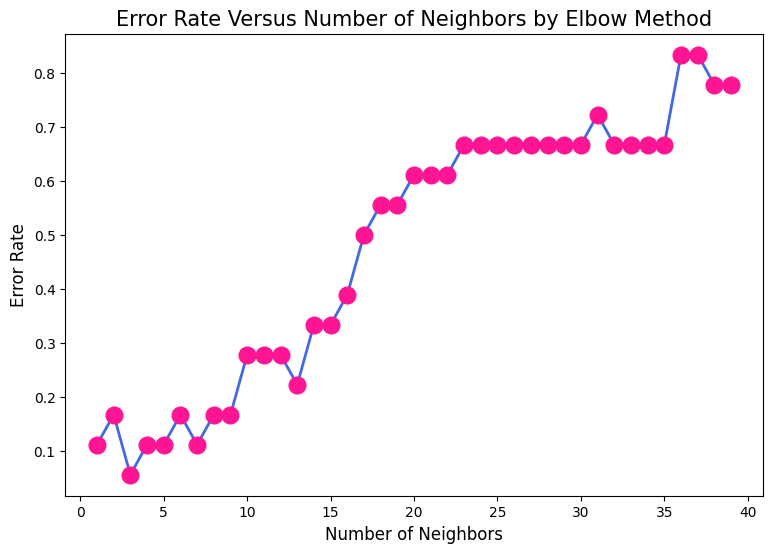

In [49]:
plt.figure(figsize=(9,6))
plt.plot(list(range(1,40)), error_rate, color='royalblue', marker='o',linewidth=2, markersize=12, markerfacecolor='deeppink', markeredgecolor='deeppink' )
plt.xlabel('Number of Neighbors', fontsize=12)
plt.ylabel('Error Rate', fontsize=12)
plt.title('Error Rate Versus Number of Neighbors by Elbow Method', fontsize=15)
plt.show()

We can see that the minimum error rate is obtained for k=3.

### Performing KNN with the Chosen Number of Neighbors

In [50]:
knc=KNeighborsClassifier(n_neighbors=3)
knc.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [51]:
prediction_knn=knc.predict(X_test)

In [52]:
print(confusion_matrix(y_test,prediction_knn))
print('\n')
print(classification_report(y_test,prediction_knn))
print('\n')
print('Accuracy Score: ',round(accuracy_score(y_test,prediction_knn), ndigits=2))

[[4 0 0 0]
 [0 3 0 0]
 [0 0 2 0]
 [1 0 0 8]]


              precision    recall  f1-score   support

       apple       0.80      1.00      0.89         4
       lemon       1.00      1.00      1.00         3
    mandarin       1.00      1.00      1.00         2
      orange       1.00      0.89      0.94         9

    accuracy                           0.94        18
   macro avg       0.95      0.97      0.96        18
weighted avg       0.96      0.94      0.95        18



Accuracy Score:  0.94


The accuracy of our model is 78% . Now let's test the prediction of our model for given values.

Ref: https://towardsdatascience.com/a-look-at-precision-recall-and-f1-score-36b5fd0dd3ec

### Evaluating the Performace of the Model

In [53]:
scaled_df.head()

,mass,width,height
0,-2.793595,1.598690,-0.291397
1,-2.268684,1.104854,-0.661922
2,-2.137456,0.364100,-0.365502
3,0.487100,-1.117409,-2.218131
4,0.355872,-1.364327,-2.292236


First we choose the first row of scaled_df and df and evaluate the prediction of our model.

In [65]:
# for i in range(0, scaled_df.shape[0], 10):
for i in np.random.randint(0, scaled_df.shape[0], 5):
    print(f"Predicted Output: {knc.predict([scaled_df.iloc[i]])[0]}")
    print(f"Expected Output: {df.iloc[i]['fruit_name']}")
    print("\n")

Predicted Output: apple
Expected Output: apple


Predicted Output: lemon
Expected Output: lemon


Predicted Output: apple
Expected Output: apple


Predicted Output: orange
Expected Output: orange


Predicted Output: lemon
Expected Output: lemon




c:\Users\psg44\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

c:\Users\psg44\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

c:\Users\psg44\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

c:\Users\psg44\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

c:\Users\psg44\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature na

## Conclusion

-  Here we worked on Fruits with Colors Dataset and implemented K-Nearest Neighbors Classification to predict the type of fruit


-  The K-Nearest Neighbors Classifier performed well with 78% accuracy in predicting type of fruits.